In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("online_retail.csv", encoding = "ISO-8859-1")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
print('Total Quantity < 0 adalah {} data atau sebesar {}%'.format(len(df[df['Quantity']<0]), round(len(df[df['Quantity']<0]) / len(df) * 100, 2)))
print('Total UnitPrice < 0 adalah {} data atau sebesar {}%'.format(len(df[df['UnitPrice']<0]), round(len(df[df['UnitPrice']<0]) / len(df) * 100, 4)))

Total Quantity < 0 adalah 10624 data atau sebesar 1.96%
Total UnitPrice < 0 adalah 2 data atau sebesar 0.0004%


Seperti pada Data Preprocessing, Quantity < 0 merupakan data Cancellation dan UnitPrice < 0 berasal dari NaN values CustomerID. Berdasarkan data diatas, persentase Quantity < 0 hanya sebesar 2% dan bisa dikatakan bahwa sekitar 73% Quantity dari pembelian setiap produk adalah antara 1 hingga 10 seperti grafik dibawah. Disisi lain, customer banyak melakukan pembelian pada produk yang memiliki harga 0.01£ hingga 4.13£.

Karena setiap customer melakukan total pembelian produk yang beragam, saya akan memasukkannya ke dalam beberapa kelompok agar mudah dibaca.

In [6]:
def kategori(data):
    if data < 0:
        return '< 0 (Cancel)'
    elif (data > 0) & (data < 11):
        return '1 - 10'
    elif (data > 10) & (data < 101):
        return '11 - 100'
    elif (data > 100) & (data < 1001):
        return '101 - 1000'
    else:
        return '> 1000'

In [7]:
df['Kategori_jumlah_pembelian'] = df['Quantity'].apply(lambda x: kategori(x))

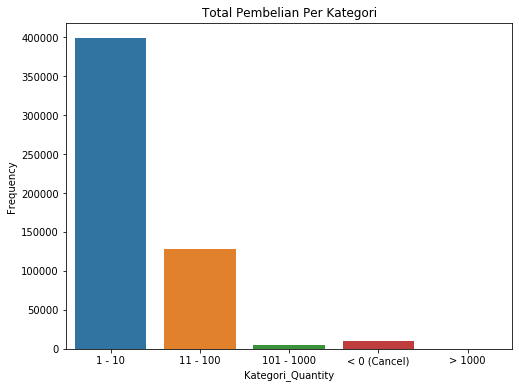

In [8]:
plt.figure(figsize = (8, 6))
sns.countplot(x = df['Kategori_jumlah_pembelian'])
plt.xlabel('Kategori_Quantity')
plt.ylabel('Frequency')
plt.title('Total Pembelian Per Kategori')
plt.savefig('Quantity.png')

In [9]:
def kategori_harga(data):
    if data < 0:
        return '< 0'
    elif (data > 0) & (data < 2.09):
        return '0.1 - 2.08'
    elif (data > 2.08) & (data < 4.14):
        return '2.09 - 4.13'
    else:
        return '> 4.13'

In [10]:
df['Kategori_UnitPrice'] = df['UnitPrice'].apply(lambda x: kategori_harga(x))

Text(0.5, 1.0, 'UnitPrice Per Kategori')

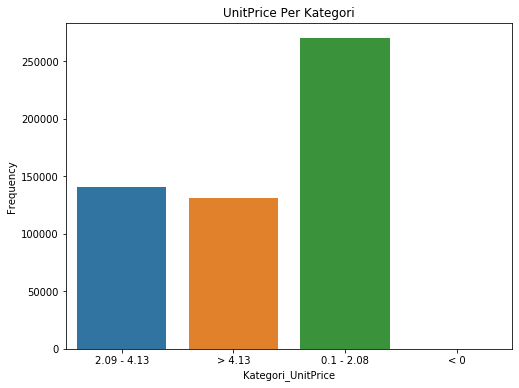

In [11]:
plt.figure(figsize = (8, 6))
sns.countplot(x = df['Kategori_UnitPrice'])
plt.xlabel('Kategori_UnitPrice')
plt.ylabel('Frequency')
plt.title('UnitPrice Per Kategori')

Kedua grafik diatas menunjukkan bahwa mayoritas pembeli melakukan transaksi pada produk yang memiliki rentang harga 0.1£ - 2.08£ dan membeli sebanyak 1 hingga 10 buah. Disisi lain, produk dengan rentang harga 2.09£ - 4.13£ dan lebih dari 4.13£ juga banyak dibeli.

**Berapakah produk yang telah dibeli?**

In [12]:
unique_id = []
unique_product = []

for i in df['CustomerID'].unique():
    unique_id.append(i)
    unique_product.append(len(df[df['CustomerID'] == i]['StockCode'].unique()))

In [13]:
count_product = pd.DataFrame()
count_product['custID'] = unique_id
count_product['total'] = unique_product

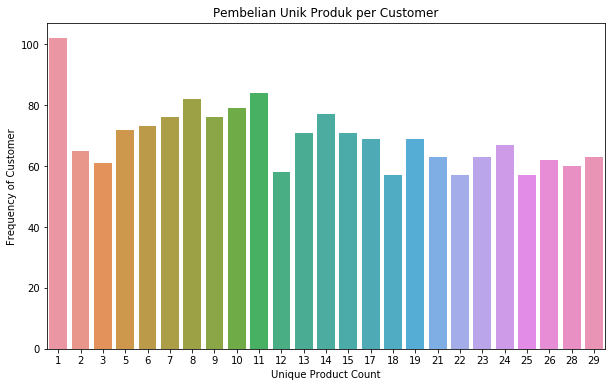

In [14]:
plt.figure(figsize = (10, 6))
sns.barplot(y = count_product['total'].value_counts().head(25).values, x = count_product['total'].value_counts().head(25).index.astype('object'))
plt.xlabel('Unique Product Count')
plt.ylabel('Frequency of Customer')
plt.title('Pembelian Unik Produk per Customer')
plt.savefig('Product')

Berdasarkan grafik diatas, sekitar 105 customer melakukan pembelian hanya 1 jenis produk. Tetapi, bisa dikatakan bahwa customer senang dan percaya berbelanja di Online Retail tersebut karena pembelian jenis produk lebih dari 1 sangat mendominasi. Namun, tidak bisa dikatakan bahwa customer menyukai setiap produk yang mereka beli. 

**Popularitas dari produk**<br>

In [15]:
df['StockCode'].value_counts().describe()

count    4070.000000
mean      133.147174
std       199.903331
min         1.000000
25%        14.000000
50%        62.000000
75%       167.000000
max      2313.000000
Name: StockCode, dtype: float64

In [16]:
popularity = pd.DataFrame(df['StockCode'].value_counts())

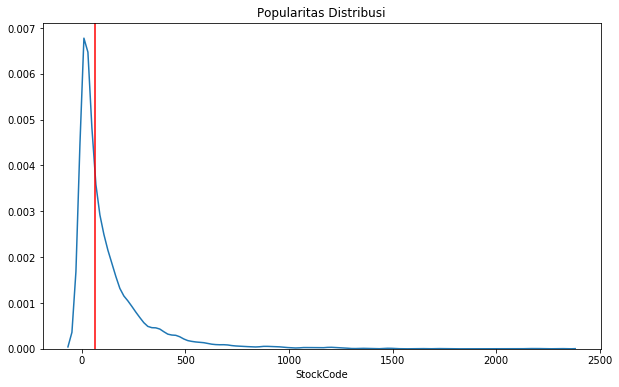

In [17]:
plt.figure(figsize = (10, 6))
sns.distplot(popularity['StockCode'], hist = False)
plt.axvline(np.median(popularity['StockCode']), color = 'red')
plt.title('Popularitas Distribusi')
plt.savefig('StockCode')

Grafik diatas merupakan distribusi dari Popularity atau seberapa banyak item tersebut telah dijual. Dari beberapa artikel yang saya baca, Long Tail Distribution dalam marketing dapat melihat produk yang permintaannya sedikit serta sulit untuk dicari. Selain itu, perusahaan dapat memaksimalkan produk tersebut untuk direkomendasikan guna meningkatkan profit dibandingkan mempopulerkan produk yang sudah populer.

In [18]:
df['StockCode'].value_counts()[]

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
20849        1
84612B       1
84247C       1
16053        1
90026A       1
Name: StockCode, Length: 4070, dtype: int64

In [22]:
df[df['StockCode'] == '90026A']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Kategori_jumlah_pembelian,Kategori_UnitPrice
224923,556579,90026A,GLASS BEAD HOOP NECKLACE BLACK,2,6/13/2011 14:16,8.5,15069.0,United Kingdom,1 - 10,> 4.13


Terdapat beberapa StockCode yang NaN bukan sekedar langka namun memang kebutuhan customer tidak sesuai.